In [1]:
## turn on the autocomplete if off by default
%config Completer.use_jedi = False

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  


## Below is a simple NN example in PyTorch to illustrate:
1. Data Read (interactive)
2. Normalize feature set



In [2]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
# Model Report Card
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

In [3]:
from tqdm import tqdm, tqdm_notebook

In [4]:
# upload iris data interactively to google drive and access the data
# from google.colab import files
# uploaded = files.upload()
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [22]:
# access data file
# df = pd.read_csv(io.StringIO(uploaded['iris.csv'].decode('utf-8')))
df = pd.read_csv("/content/gdrive/MyDrive/Solution Implementation Course/loans_2007.csv")
df.drop(df.columns[[0]], axis=1, inplace=True)# there is an unnamed column in the first col.
df.head(4)

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,home_ownership,verification_status,purpose,term
0,5000.0,10.65,162.87,10,24000.0,1,860,27.65,0.0,739.0,1.0,3.0,0.0,13648.0,83.7,9.0,744.0,RENT,Verified,credit_card,36 months
1,2500.0,15.27,59.83,0,30000.0,0,309,1.00,0.0,744.0,5.0,3.0,0.0,1687.0,9.4,4.0,499.0,RENT,Source Verified,car,60 months
2,2400.0,15.96,84.33,10,12252.0,1,606,8.72,0.0,739.0,2.0,2.0,0.0,2956.0,98.5,10.0,719.0,RENT,Not Verified,small_business,36 months
3,10000.0,13.49,339.31,10,49200.0,1,917,20.00,0.0,694.0,1.0,10.0,0.0,5598.0,21.0,37.0,604.0,RENT,Source Verified,other,36 months


In [23]:
df.describe()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high
count,39252.000000,39252.000000,39252.000000,39252.000000,3.925200e+04,39252.000000,39252.000000,39252.000000,39252.000000,39252.000000,39252.000000,39252.000000,39252.000000,39252.00000,39202.000000,39252.000000,39252.000000
mean,11137.180271,11.982838,323.311302,4.826047,6.888910e+04,0.855651,502.382834,13.295056,0.146617,718.996179,0.870325,9.287017,0.055411,13329.80908,48.741092,22.074671,691.787883
std,7400.231838,3.708876,208.472820,3.603563,6.399421e+04,0.351448,329.753183,6.676636,0.491688,35.868039,1.070851,4.402469,0.238061,15875.00293,28.350143,11.412718,79.575687
min,500.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,7.000000,0.000000,0.000000,629.000000,0.000000,2.000000,0.000000,0.00000,0.000000,2.000000,0.000000
25%,5400.000000,8.940000,166.310000,2.000000,4.003500e+04,1.000000,200.000000,8.160000,0.000000,689.000000,0.000000,6.000000,0.000000,3671.50000,25.300000,13.000000,649.000000
50%,10000.000000,11.830000,279.090000,4.000000,5.900000e+04,1.000000,448.000000,13.390000,0.000000,714.000000,1.000000,9.000000,0.000000,8805.00000,49.100000,20.000000,699.000000
75%,15000.000000,14.460000,427.370000,9.000000,8.200000e+04,1.000000,852.000000,18.580000,0.000000,744.000000,1.000000,12.000000,0.000000,16985.25000,72.300000,29.000000,749.000000
max,35000.000000,24.590000,1305.190000,10.000000,6.000000e+06,1.000000,999.000000,29.990000,11.000000,829.000000,8.000000,44.000000,4.000000,149588.00000,99.900000,90.000000,850.000000


In [24]:
df.verification_status.value_counts()

Not Verified       16846
Verified           12533
Source Verified     9873
Name: verification_status, dtype: int64

In [25]:
# what isthe structure of my dataset
print(df.shape)
# df.describe()

(39252, 21)


In [26]:
aggegate = df.loan_status.value_counts().to_frame('n')
aggegate['percent'] = np.round(100*(aggegate['n']/(aggegate['n'].sum())),2)
aggegate

,n,percent
1,33586,85.57
0,5666,14.43


1. Remove all the columns that get added after loan issue
> amount of loan <br/>
> installment
2. Any other variable?

In [27]:
df.drop(['loan_amnt', 'installment', 'term'], axis=1, inplace=True)
# df.drop(['installment', 'term'], axis=1, inplace=True)

In [28]:
df.columns

Index(['int_rate', 'emp_length', 'annual_inc', 'loan_status', 'zip_code',
       'dti', 'delinq_2yrs', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'last_fico_range_high', 'home_ownership', 'verification_status',
       'purpose'],
      dtype='object')

In [29]:
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      df.isnull().sum()/df.shape[0])

 
Count total NaN at each column in a DataFrame : 

 int_rate                0.000000
emp_length              0.000000
annual_inc              0.000000
loan_status             0.000000
zip_code                0.000000
dti                     0.000000
delinq_2yrs             0.000000
fico_range_high         0.000000
inq_last_6mths          0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.001274
total_acc               0.000000
last_fico_range_high    0.000000
home_ownership          0.000000
verification_status     0.000000
purpose                 0.000000
dtype: float64


In [30]:
df = df.dropna(subset=['revol_util'])

In [31]:
# Make category of columns

# Numerical variables ( can be continous (can take any numerical value) or discreet (can only take whole numbers as values) )
# numerical_column = [ 'int_rate', 'emp_length', 'annual_inc', \
#                     'zip_code', 'dti', 'delinq_2yrs', 'fico_range_high', \
#                     'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',\
#                     'revol_util', 'total_acc', 'last_fico_range_high']
numerical_column = [ 'int_rate', 'emp_length', 'annual_inc', 'delinq_2yrs', 'fico_range_high','revol_bal', 'open_acc','loan_status']
# Categorical - ( can be nominal (no order categories) or ordinal (ordered categories) )
# categorical_column = ['home_ownership', 'verification_status', 'purpose']

target_column = ['loan_status']

In [32]:
numerical_column[:-1]

['int_rate',
 'emp_length',
 'annual_inc',
 'delinq_2yrs',
 'fico_range_high',
 'revol_bal',
 'open_acc']

In [33]:
# Split into feature set "X" and target variable "y"
y = df[target_column]
df = df[numerical_column]
X = df.drop(columns=target_column)
print(f"Shape of X: {X.shape}\nShape of y: {y.shape}")

Shape of X: (39202, 7)
Shape of y: (39202, 1)


In [34]:
# Split data into train and test (Validation in our case)
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, test_size=0.30)

print(f"Shape of Xtrain: {Xtrain.shape}\n\
Shape of Xtest: {Xtest.shape}\n\
Shape of ytrain: {ytrain.shape}\n\
Shape of ytest: {ytest.shape}")

Shape of Xtrain: (27441, 7)
Shape of Xtest: (11761, 7)
Shape of ytrain: (27441, 1)
Shape of ytest: (11761, 1)


In [35]:
# # Data transformation

# # Scaling choosen as it bring data into range of 0 to 1 
# ct = ColumnTransformer(transformers=[('standardscaler', StandardScaler(), numerical_column[:-1])])
# # ct = ColumnTransformer(transformers=[('standardscaler', StandardScaler(), numerical_column),
# #                                 ('onehotencoder', OneHotEncoder(drop="first"), categorical_column)])
# # Apply on Train features
# ct.fit(Xtrain) # Learn the stats for this data set
# Xtrain = ct.transform(Xtrain) # Apply Transformations

# # Second way in one line
# # ct.fit_transform(Xtrain)

# # Apply on Test Features (Make sure you dont use Fit this time)
# # You will apply the same stats for transfromation over test set which you have have learned over the training set.

# Xtest = ct.transform(Xtest)

# # Check
# print(f"Shape of Xtrain: {Xtrain.shape}\n\
# Shape of Xtest: {Xtest.shape}\n\
# Shape of ytrain: {ytrain.shape}\n\
# Shape of ytest: {ytest.shape}")

Shape of Xtrain: (27441, 7)
Shape of Xtest: (11761, 7)
Shape of ytrain: (27441, 1)
Shape of ytest: (11761, 1)


In [36]:
# Here our X is in correct 2-d shape as a matrix
# Convert y to 1-d array

ytrain = ytrain.values.ravel()
ytest = ytest.values.ravel()

In [37]:
# Now the train a Logistics Regression Model

from sklearn.ensemble import RandomForestClassifier
# model=RandomForestClassifier(class_weight='balanced')
model = LogisticRegression(solver='newton-cg', class_weight='balanced')              # 1. instantiate model (Again you can sepcify the model specific Hyperparameters)

model.fit(Xtrain, ytrain)                  # 2. fit model to data

y_model = model.predict(Xtest)             # 3. predict on new data
y_model

array([1, 1, 1, ..., 0, 0, 1])

In [38]:
# Create a new DataFrame to store the results
classification_results = pd.DataFrame(columns=['classifier_Name', 'Accuracy_Score'])

In [39]:
# Make sure you pass the values in same order. First ytest (Orginal values) and then y_model (Model which will predict the y values)
accuracy_score(ytest, y_model)
classification_results = classification_results.append({'classifier_Name': 'Random forest', 'Accuracy_Score': accuracy_score(ytest, y_model)}, ignore_index=True)
classification_results

,classifier_Name,Accuracy_Score
0,Random forest,0.63617


Text(91.68, 0.5, 'predicted label')

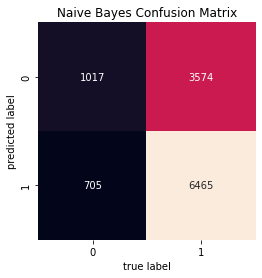

In [40]:
# Plot Confusion Matrix
# Format is -> confusion_matrix(Actual, Predicted)
c_matrix = confusion_matrix(ytest, y_model)
sns.heatmap(c_matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')

In [41]:
print(classification_report(ytest, y_model))

              precision    recall  f1-score   support

           0       0.22      0.59      0.32      1722
           1       0.90      0.64      0.75     10039

    accuracy                           0.64     11761
   macro avg       0.56      0.62      0.54     11761
weighted avg       0.80      0.64      0.69     11761



In [42]:
# save model in a pickle format .pkl
import pickle
pickle_out = open("/content/gdrive/MyDrive/Solution Implementation Course/model.pkl","wb")
pickle.dump(model, pickle_out)
pickle_out.close()